# Numba User Survey 2024

Author: https://github.com/esc

Welcome! [Numba](numba.pydata.org) is a Python Just-in-Time (JIT) compiler with a strong numerical focus and native support for compiling [NumPy](numpy.org) based code.

In March 2024 the Numba team conducted the first ever Numba User Survey. The Goal was to ask a few simple questions -- asking for about 5 minutes of attention -- in order to better understand a subset of the Numba user community. We, the core development team, wanted to know what sort of code is being accelerated with Numba, what features people enjoy and what features people think could be improved. Ultimately, the goal is for this data and the results to shape the Numba development roadmap and to have a tangible influence over the priorities. 

In this report I will only present the data and results of the user survey, speculating on what might be good avenues to explore and not commit to any actionable items just yet. Stay tuned!

Lastly, in the name of the community, I would like to say "Thank You!" to the 137 particpants who contributed their attention to our cause. 🙏

----

Note: this notebook and the raw CSV data can be found on Github: https://github.com/numba/numba-user-survey-2024

Orignal author of this report: https://github.com/esc

Many thanks to https://github.com/seibert for the original concept and design of the survey questions and to https://github.com/kc611, https://github.com/sklam and https://github.com/stuartarchibald for valuable feed during the design, execution and analysis phases of this survey. ❤️

In [1]:
import pandas as pd
import numpy as np
from matplotlib import colormaps

In [2]:
# disable a warning for this notebook
pd.set_option('future.no_silent_downcasting', True)

In [3]:
# get the Pastel1 colormap and remove the yellow as it doesn't look good on a white background
p1map = colormaps['Pastel1']
cmap = p1map.colors[:5] + p1map.colors[6:]

In [4]:
# Read the scrubbed CSV file
df = pd.read_csv("numba-user-survey-2024.scrubbed.csv", encoding="utf-8")

In [5]:
def extract_data(start, end):
    # get all columns that contain data for question
    d = df[df.columns[start:end]]
    # get the first line, which contains the answer options
    options = list(d.iloc[0:1].iloc[0])
    # Create a mapping from old column names to new ones
    column_name_map = dict(zip(list(d), options))
    # Fixup the column names
    d = d.rename(columns=column_name_map)
    return d, options

In [6]:
def extract_data_for_checkbox_question(start, end):
    d, options = extract_data(start, end)
    # Turn the object/string fields into numerical data
    d = d.replace(to_replace=options + [np.nan], value=[1] * len(options) + [0]).astype('float64')
    # strip the first line as it still conatins the answer options
    d = d.iloc[1:]
    # return final dataframe
    return d

In [7]:
def extract_data_for_ranking_question(start, end):
    d,options = extract_data(start, end)
    # strip the first line as it still conatins the answer options and convert to numerical data
    d = d.iloc[1:].astype("float64")
    # return final dataframe
    return d

In [8]:
def fixup_column_names_for_plotting(d):
    old = list(d.columns)
    new = []
    for s in old:
        new_string = []
        if len(s) <= 30:
            new_string.append(s)
        else:
            new_string.append(s[:30])
        if len(s) >= 31:
            new_string.append("" if s[30] == " " else "-")
            new_string.append("\n")
        if len(s) <= 58:
            new_string.append(s[30:])
        else:
            new_string.append(s[30:58] if s[30] != " " else s[31:58])
        if len(s) > 58:
            new_string.append("...")
        new.append("".join(new_string))
    return d.rename(columns=dict(zip(old, new)))

In [9]:
def plot_checkbox_question(frame, title="TBD"):
    frame = fixup_column_names_for_plotting(frame)
    figsize = (10, 10) if len(frame.columns) >= 15 else (10, 6)
    (frame.mean() * 100).plot.barh(title=title, color=cmap, figsize=figsize).invert_yaxis()

In [10]:
def plot_ranking_questions(frame, title="TBD", total_responses=137):
    frame = fixup_column_names_for_plotting(frame)
    ((((frame.sum() / total_responses)) - 10) * -1).plot.barh(title=title, color=cmap, figsize=(10,7)).invert_yaxis()

# Q1

For Question 1 we asked: **How do you interact with the Numba project? (check all that apply)**

The possible responses were:

* I regularly use Numba to speed up Python code I have personally written.
* I maintain an open source project that depends on Numba.
* I maintain a proprietary or non-public project that depends on Numba (might be internal to your organization).
* I have contributed a pull request to Numba.
* I am a regular reader of the Numba discussion forums.
* I answer other people's questions about Numba on forums, StackOverflow, etc.
* I package Numba for distribution (conda, Linux distributions, homebrew, etc)

In [11]:
# Extract data and display percentage of responses
d1 = extract_data_for_checkbox_question(0, 7)

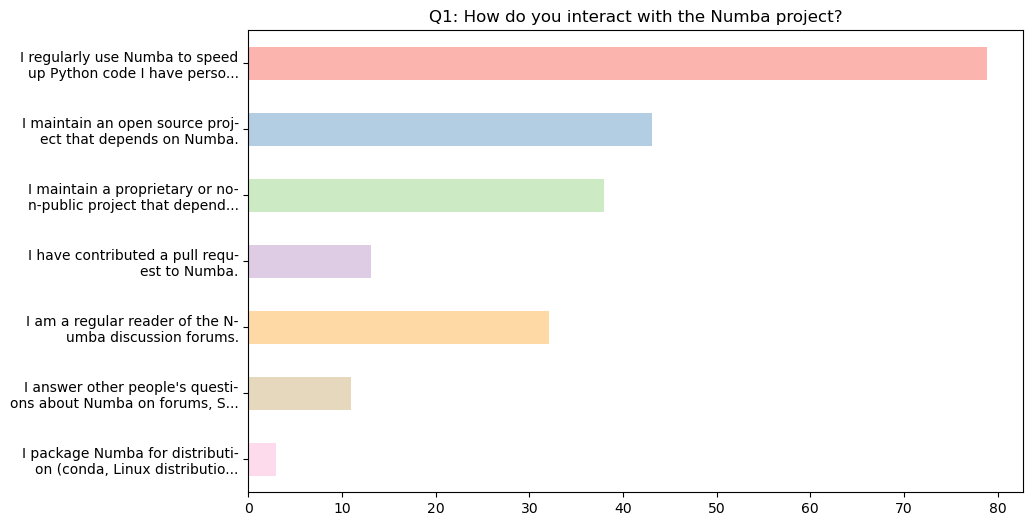

In [12]:
# Visualize the results
plot_checkbox_question(d1, title="Q1: How do you interact with the Numba project?")

In [13]:
# Sorted numerical results
(d1.mean() * 100).sort_values()[::-1]

I regularly use Numba to speed up Python code I have personally written.                                          78.832117
I maintain an open source project that depends on Numba.                                                          43.065693
I maintain a proprietary or non-public project that depends on Numba (might be internal to your organization).    37.956204
I am a regular reader of the Numba discussion forums.                                                             32.116788
I have contributed a pull request to Numba.                                                                       13.138686
I answer other people's questions about Numba on forums, StackOverflow, etc.                                      10.948905
I package Numba for distribution (conda, Linux distributions, homebrew, etc)                                       2.919708
dtype: float64

Almost 80% of the participants responded that they regularly use Numba to speed up code they had personally written. 43% maintin an open source project that depends on Numba and a further 38% maintain a proprietary or non-public project that depends on Numba. Interestingly, 32% are regular readers of the Numba discourse, which is a good indicator that our dicsourse forum is accepted by the community.

# Q2

For Question 2 we asked **What kinds of applications do you use Numba for? (check all that apply)**.

The possible responses were:

* Hobby
* Educational projects
* Visualization
* Financial analytics
* Scientific research
* Compiler development
* Web-based microservices
* High performance computing on clusters
* Numerical simulations / "Digital Twins"
* Machine learning / AI
* Time series analysis
* Spatial / GIS data set processing

In [14]:
# Extract data and display percentage of responses
d2 = extract_data_for_checkbox_question(7, 19)

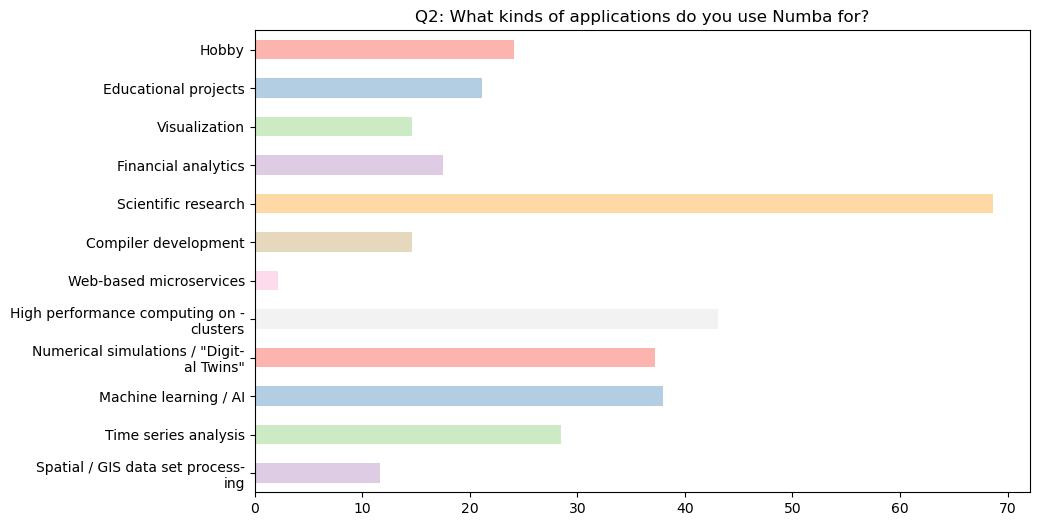

In [15]:
# Visualize the results
plot_checkbox_question(d2, title="Q2: What kinds of applications do you use Numba for?")

In [16]:
# Sorted numerical results
(d2.mean() * 100).sort_values()[::-1]

Scientific research                        68.613139
High performance computing on clusters     43.065693
Machine learning / AI                      37.956204
Numerical simulations / "Digital Twins"    37.226277
Time series analysis                       28.467153
Hobby                                      24.087591
Educational projects                       21.167883
Financial analytics                        17.518248
Compiler development                       14.598540
Visualization                              14.598540
Spatial / GIS data set processing          11.678832
Web-based microservices                     2.189781
dtype: float64

As you can see, almost 70% of participants use Numba for scientific research. This is great news! Perhaps this is a testament to the flexibility of Numba and it's usefulness in implementing cutting edge algorithms for which no framework or custom library exists yet. The second place with 43% is High Performance Computing, which may be closely linked to scientific computing. The next three most popular responses were Machine Learning / AI with 38%, Numerical Simulations with 37% and then time series analysis with 28%. These are all use-cases that we expected and it's good to see some evidence to support these use-cases. Lastly, 14.5% of participants also use it for compiler development and we hope that this use-case will become more popular as Numba transitions from a JIT-compiler to a compiler toolkit. 

# Q3

For Question 3 we asked **Which of the following Numba features have you found useful? (check all that apply)**

The possible responses were:

* Support for raising exceptions (raise statement)
* Support for catching exceptions (try-except statement)
* Support for generators
* Typed containers (typed.List, typed.Dict)
* Using NumPy functions in compiled code
* Compiling Python classes as structs using @jitclass
* Automatic multithreading with @jit(parallel=True) and/or prange()
* CUDA kernel compilation (@cuda.jit)
* Creating C callbacks with @cfunc
* Creating NumPy ufuncs with @vectorize or @guvectorize
* Creating stencil functions with @stencil
* Calling back into the Python interpreter using "with objmode"
* Caching of compiled functions to disk
* Ahead of time compilation (with numba.pycc)
* Debugging tools (gdb support, LLVM IR and assembly dumps, etc)
* Autovectorization
* The extension API (@overload, etc)
* First class function types (types.FunctionType)

In [17]:
d3 = extract_data_for_checkbox_question(19, 37)

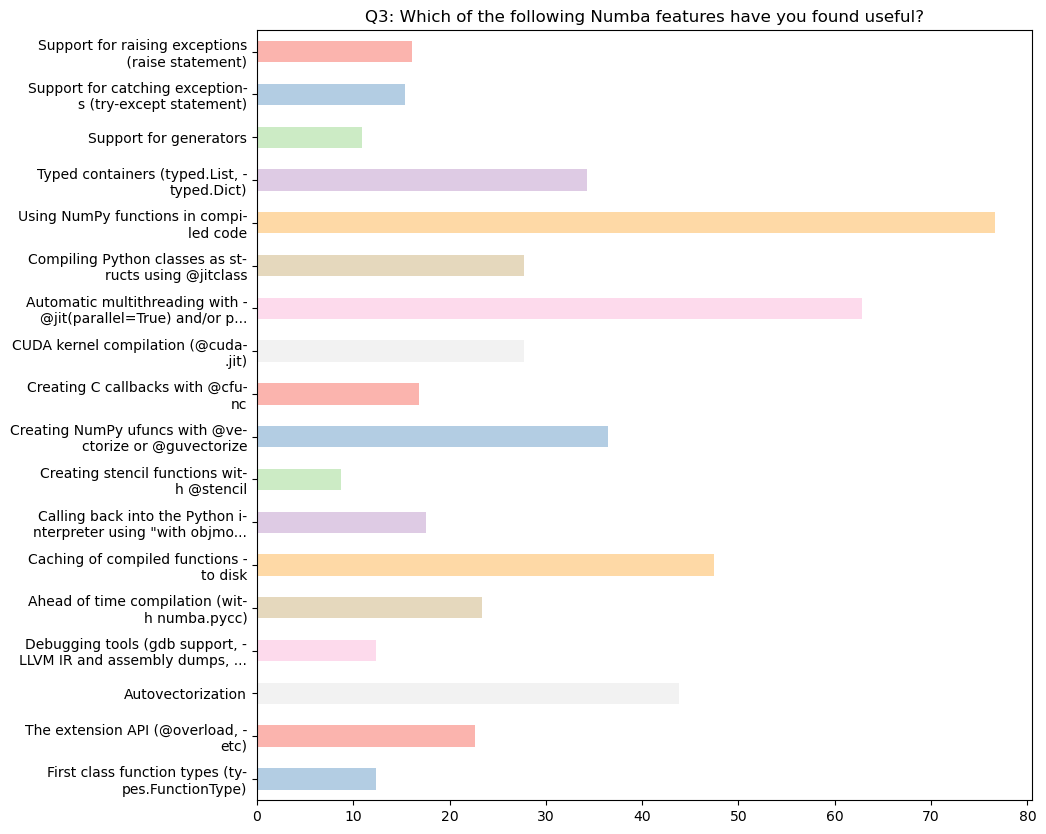

In [18]:
plot_checkbox_question(d3, title="Q3: Which of the following Numba features have you found useful?")

In [19]:
# Sorted numerical results
(d3.mean() * 100).sort_values()[::-1]

Using NumPy functions in compiled code                               76.642336
Automatic multithreading with @jit(parallel=True) and/or prange()    62.773723
Caching of compiled functions to disk                                47.445255
Autovectorization                                                    43.795620
Creating NumPy ufuncs with @vectorize or @guvectorize                36.496350
Typed containers (typed.List, typed.Dict)                            34.306569
Compiling Python classes as structs using @jitclass                  27.737226
CUDA kernel compilation (@cuda.jit)                                  27.737226
Ahead of time compilation (with numba.pycc)                          23.357664
The extension API (@overload, etc)                                   22.627737
Calling back into the Python interpreter using "with objmode"        17.518248
Creating C callbacks with @cfunc                                     16.788321
Support for raising exceptions (raise statement)    

The top result of the this question comes without surprises, after all Numba was created initially as a NumPy compiler. It's good to see that it remains widely used to satisfy this use-case. Finishing in second place is the `parfors` or [Parallel Accelerator](https://numba.pydata.org/numba-doc/latest/user/parallel.html) component of Numba. ["Caching of compiled fuctions to disk"](https://numba.pydata.org/numba-doc/latest/developer/caching.html) comes in third place, followed by Autovectorization and [creating NumPy ufuncs](https://numba.pydata.org/numba-doc/latest/user/vectorize.html). For us this is an indicator that these features are important and should not be broken or deprecated as many users depend on them. Perhaps this evidence could help shaping a data-driven priority for debugging and fixing user-report bugs?

# Q4

For Question 4 we asked: **Which of the following Numba features did not work for you or were too limited for your use case? (check all that apply)**

The possible responses were, again:

* Support for raising exceptions (raise statement)
* Support for catching exceptions (try-except statement)
* Support for generators
* Typed containers (typed.List, typed.Dict)
* Using NumPy functions in compiled code
* Compiling Python classes as structs using @jitclass
* Automatic multithreading with @jit(parallel=True) and/or prange()
* CUDA kernel compilation (@cuda.jit)
* Creating C callbacks with @cfunc
* Creating NumPy ufuncs with @vectorize or @guvectorize
* Creating stencil functions with @stencil
* Calling back into the Python interpreter using "with objmode"
* Caching of compiled functions to disk
* Ahead of time compilation (with numba.pycc)
* Debugging tools (gdb support, LLVM IR and assembly dumps, etc)
* Autovectorization
* The extension API (@overload, etc)
* First class function types (types.FunctionType)

In [20]:
d4 = extract_data_for_checkbox_question(37, 55)

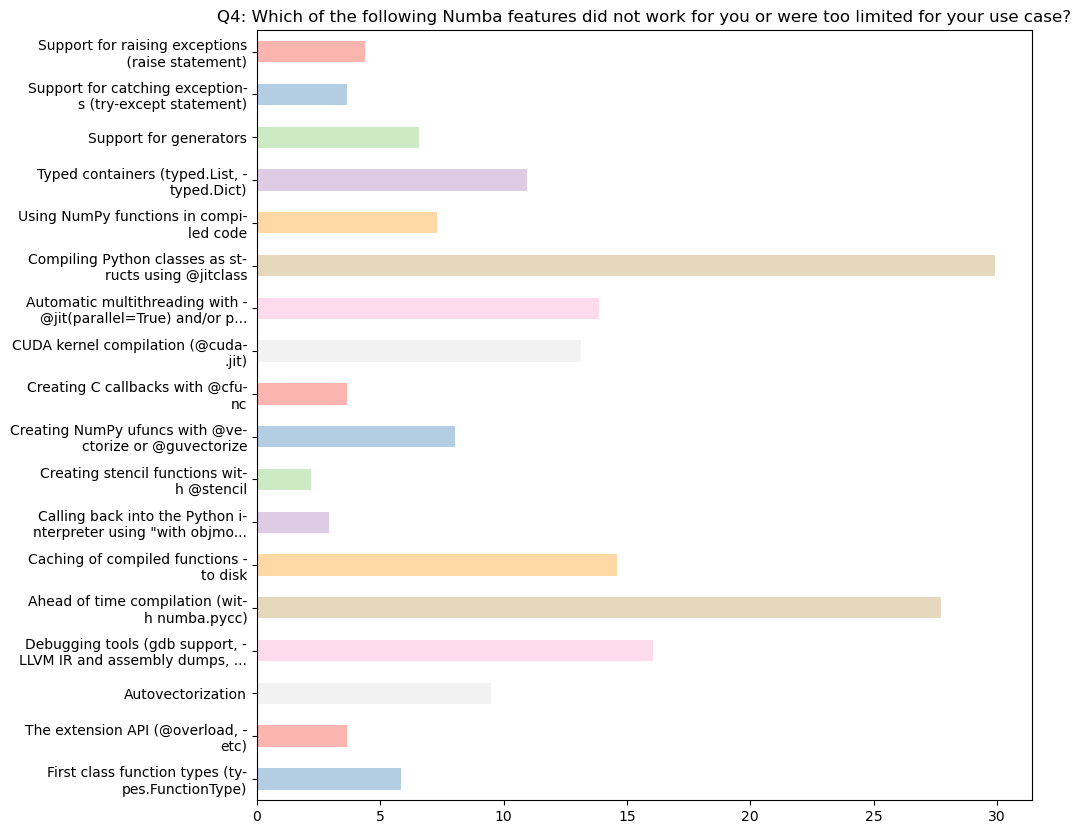

In [21]:
plot_checkbox_question(d4, title="Q4: Which of the following Numba features did not work for you or were too limited for your use case?")

In [22]:
# Sorted numerical results
(d4.mean() * 100).sort_values()[::-1]

Compiling Python classes as structs using @jitclass                  29.927007
Ahead of time compilation (with numba.pycc)                          27.737226
Debugging tools (gdb support, LLVM IR and assembly dumps, etc)       16.058394
Caching of compiled functions to disk                                14.598540
Automatic multithreading with @jit(parallel=True) and/or prange()    13.868613
CUDA kernel compilation (@cuda.jit)                                  13.138686
Typed containers (typed.List, typed.Dict)                            10.948905
Autovectorization                                                     9.489051
Creating NumPy ufuncs with @vectorize or @guvectorize                 8.029197
Using NumPy functions in compiled code                                7.299270
Support for generators                                                6.569343
First class function types (types.FunctionType)                       5.839416
Support for raising exceptions (raise statement)    

In the question, we effctively ask: "what is broken?". And somewhat unsurprisingly, two of the bigger "problem factories" within Numba come in at first and second place. [Jitclass](https://numba.pydata.org/numba-doc/latest/user/jitclass.html) has been around for a while, but has never really received much love. In fact, the whole sub-module was moved to the `experimental` subpackage with [PR 5197](https://github.com/numba/numba/pull/5197) -- to indicate that it isn't really "ready for production". The responses to this question indicate that users had made the experience and that perhaps this area -- or Object Oriented Programming in general -- could be a fruitious avenue to explore. The second most popular response was [Ahead of time compilation](https://numba.pydata.org/numba-doc/latest/user/pycc.html) or AOT for short. This has been on the agenda for some time and was worked on last year for the (2023 Prototype)[https://numba.discourse.group/t/proposal-numba-2023-mvp/1792], i.e. this topic is on our roadmap and significant engineering effort is being invested here. The third place just highlights the nascent state of the debugging tools for Numba, it remains notoriously tricky to debug, even for seasoned users and developers. Inevitably this is something that will ideally be addressed over time. In summary, this question really highlights peoples expectations of what Numba *should* be able to do, but for which it was simply not advanced enough yet and perhaps this highlights the areas that have been most frustrating for our users in the past.

# Q5

For Question 5 we asked: **Which of the following Numba features were usable for you, but you wish could be improved? (check all that apply)**

The possible responses were, yet again:

* Support for raising exceptions (raise statement)
* Support for catching exceptions (try-except statement)
* Support for generators
* Typed containers (typed.List, typed.Dict)
* Using NumPy functions in compiled code
* Compiling Python classes as structs using @jitclass
* Automatic multithreading with @jit(parallel=True) and/or prange()
* CUDA kernel compilation (@cuda.jit)
* Creating C callbacks with @cfunc
* Creating NumPy ufuncs with @vectorize or @guvectorize
* Creating stencil functions with @stencil
* Calling back into the Python interpreter using "with objmode"
* Caching of compiled functions to disk
* Ahead of time compilation (with numba.pycc)
* Debugging tools (gdb support, LLVM IR and assembly dumps, etc)
* Autovectorization
* The extension API (@overload, etc)
* First class function types (types.FunctionType)

In [23]:
d5 = extract_data_for_checkbox_question(55, 73)

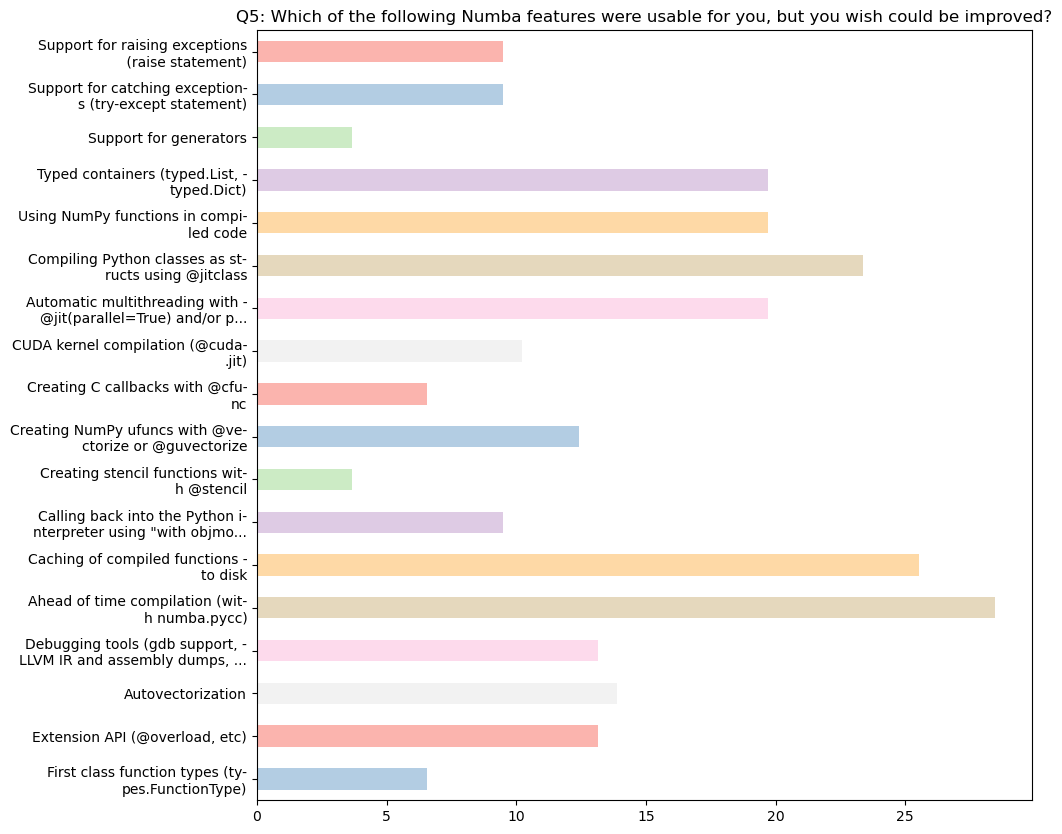

In [24]:
plot_checkbox_question(d5, title="Q5: Which of the following Numba features were usable for you, but you wish could be improved?")

In [25]:
# Sorted numerical results
(d5.mean() * 100).sort_values()[::-1]

Ahead of time compilation (with numba.pycc)                          28.467153
Caching of compiled functions to disk                                25.547445
Compiling Python classes as structs using @jitclass                  23.357664
Typed containers (typed.List, typed.Dict)                            19.708029
Automatic multithreading with @jit(parallel=True) and/or prange()    19.708029
Using NumPy functions in compiled code                               19.708029
Autovectorization                                                    13.868613
Debugging tools (gdb support, LLVM IR and assembly dumps, etc)       13.138686
Extension API (@overload, etc)                                       13.138686
Creating NumPy ufuncs with @vectorize or @guvectorize                12.408759
CUDA kernel compilation (@cuda.jit)                                  10.218978
Support for raising exceptions (raise statement)                      9.489051
Calling back into the Python interpreter using "with

The responses to this question, clearly provide more evidence in favor of investing resources into `jitclass` and into AOT.

# Q6

For Question 6 we asked: **Please rank these Numba development activities in order of how important they are to you. (From highest priority to lowest priority)**

And the possible options were:

* Response to bug reports
* Review of pull requests
* Support for new Python minor releases (3.11, 3.12, etc)
* Support for new NumPy releases
* Support for new LLVM releases
* Improved reference documentation
* Creating examples of Numba usage and performance best practices
* Feature development
* Answering user questions in the forums
* Continued support for Python releases more than 4 years old (example: Python 3.8)

In [26]:
d6 = extract_data_for_ranking_question(73, 83)

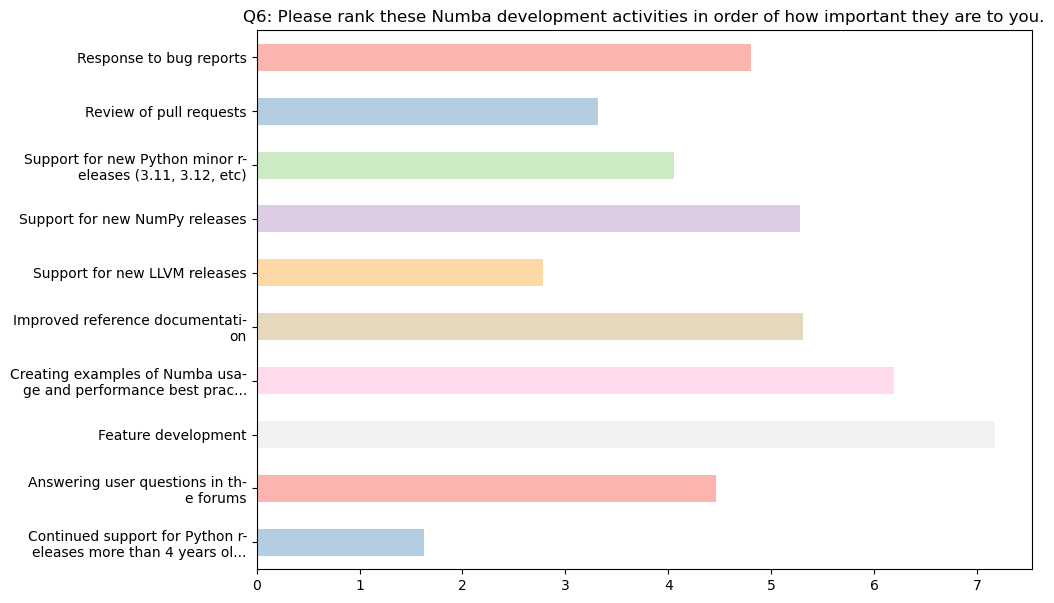

In [27]:
plot_ranking_questions(d6, title="Q6: Please rank these Numba development activities in order of how important they are to you.", total_responses=135)

In [28]:
# Summary statistic for ranking question uses a "score" -- higher means more important
((((d6.sum() / 135)) - 10) * -1).sort_values()[::-1]

Feature development                                                                  7.170370
Creating examples of Numba usage and performance best practices                      6.192593
Improved reference documentation                                                     5.311111
Support for new NumPy releases                                                       5.281481
Response to bug reports                                                              4.807407
Answering user questions in the forums                                               4.466667
Support for new Python minor releases (3.11, 3.12, etc)                              4.051852
Review of pull requests                                                              3.318519
Support for new LLVM releases                                                        2.777778
Continued support for Python releases more than 4 years old (example: Python 3.8)    1.622222
dtype: float64

The responses here indicate that Numba is probably far from feaure complete. Also, users want more examples. Is it time for a Numba cookbook? Interestingly support for legacy Python versions was ranked lowest overall. This is good evidence that our users -- or at least the slice which responded to the survey -- have adopted the stance of adopting "newer" Python versions.

# Q7

In Question 7 we asked: **Please rank these potential new Numba features in order of how important they are to you. (From highest priority to lowest priority)**

And the possible responses were:

* Ahead-of-time compilation with support for type-based dispatching and multiple CPU target specialization
* Calling C++ (not C) code directly from nopython functions
* Support for non-NVIDIA GPUs
* Better support for struct-like data types and arrays of struct data on CPU and GPU
* Context managers/with statement
* async features
* typed.Set
* yield from
* Python typing <-> Numba type integration (i.e. get a Numba signature from Python type annotations)
* More NumPy functions
* Performance profiling


In [29]:
d7 = extract_data_for_ranking_question(83, 94)

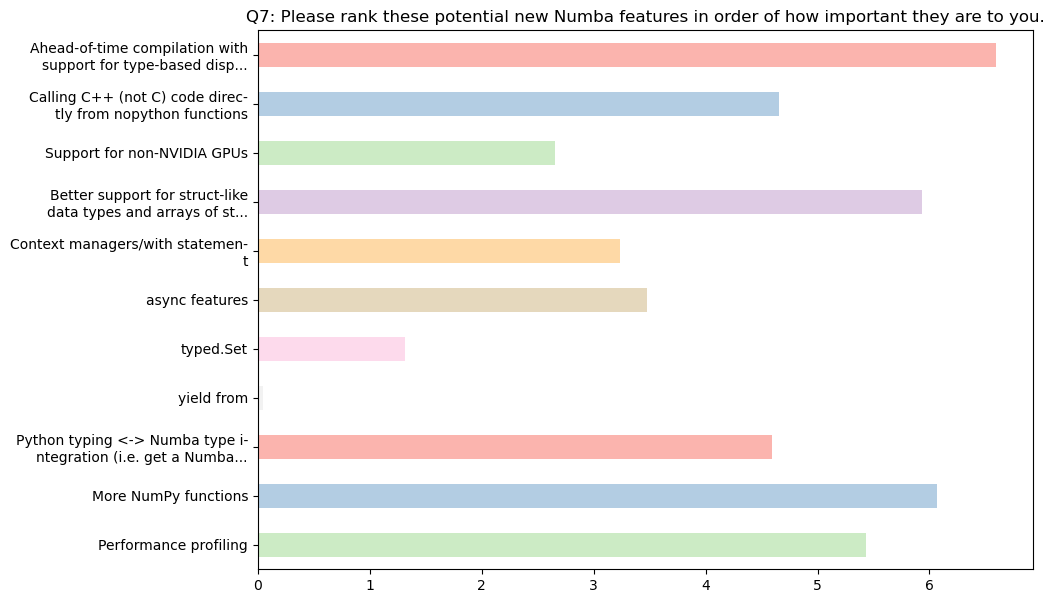

In [30]:
plot_ranking_questions(d7, title="Q7: Please rank these potential new Numba features in order of how important they are to you.", total_responses=135)

In [31]:
# Summary statistic for ranking question uses a "score" -- higher means more important
((((d7.sum() / 135)) - 10) * -1).sort_values()[::-1]

Ahead-of-time compilation with support for type-based dispatching and multiple CPU target specialization    6.592593
More NumPy functions                                                                                        6.066667
Better support for struct-like data types and arrays of struct data on CPU and GPU                          5.933333
Performance profiling                                                                                       5.429630
Calling C++ (not C) code directly from nopython functions                                                   4.659259
Python typing <-> Numba type integration (i.e. get a Numba signature from Python type annotations)          4.592593
async features                                                                                              3.474074
Context managers/with statement                                                                             3.237037
Support for non-NVIDIA GPUs                                     

The responses to this question coroborate the trends observed in questions 3, 4 and 5 and paint a very clear picture of the communities expectations.

# Q8

In Question 8 we asked: **Do you use llvmlite separately from Numba? (Yes/No)**.

This was a binary question designed to find out more about potential llvmlite users. As you can see below, 10 participantes responded with a `Yes` 

In [32]:
# Calculate total count and percentage of participants that answered Yes
total = df[df.columns[94]].iloc[1:].replace(to_replace=["Yes", "No"], value=[1, 0]).sum()
total, total/137.0 * 100

(10, 7.2992700729927)

# Q9

In Question 9 we asked: **If you answered yes in Q8, why do you use llvmlite? (check all that apply)**

The possible responses were:

* Learning about compilers
* Compiler research
* Building Python compilers (other than Numba)
* Building non-Python or domain specific compilers

In [33]:
d9 = extract_data_for_checkbox_question(96, 100).astype(int)
d9.sum()

Learning about compilers                            4
Compiler research                                   4
Building Python compilers (other than Numba)        5
Building non-Python or domain specific compilers    5
dtype: int64

In this question we wanted to know more about the people who answered Yes to question 8. Seems like llvmlite is being used as tool for LLVM code generation by a small -- but not insignificant -- minority within the community. It's nice to know, that the approach towards separartion of concerns here seems to be working.

# Q10

And finally, in Question 10 we asked: **How would you prefer to get Numba project-related announcements and updates? (check all that apply)**

The possible responses were:

* Mastodon
* X (formerly Twitter)
* YouTube
* Discourse forums
* Changelog (in docs)
* Email newsletter
* Blog

In [34]:
d10 = extract_data_for_checkbox_question(100, 107)

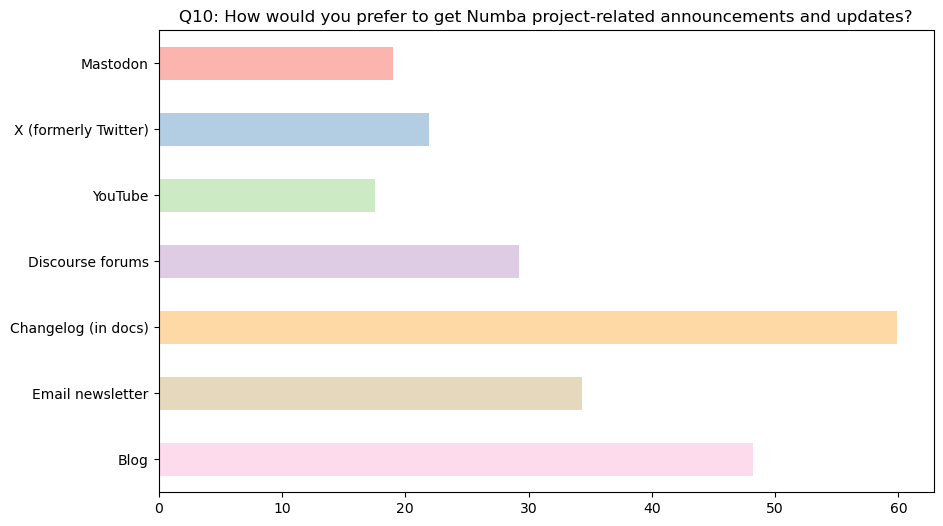

In [35]:
plot_checkbox_question(d10, title="Q10: How would you prefer to get Numba project-related announcements and updates?")

In [36]:
# Sorted numerical results
(d10.mean() * 100).sort_values()[::-1]

Changelog (in docs)     59.854015
Blog                    48.175182
Email newsletter        34.306569
Discourse forums        29.197080
X (formerly Twitter)    21.897810
Mastodon                18.978102
YouTube                 17.518248
dtype: float64

There are two takeaways for me here, one is that we will continue to produce the changelogs as we have done. And perhaps it is time to consider starting a development blog, where we can showcase some of the recent resaerch and development work about building a compiler toolkit and AOT compilation. Personally, I think the survey was a greeat success overall and all the telemetry we managed to gather can only be beneficial for Numba and our community.